# Pymaceuticals Inc.
---

### Analysis

In this study we looked at how certain drugs affected the tumor volumes of mice. The mice in the study were placed into ten different groups based on the drug regimen given. There were 248 mice used in the study, with the ratio of male to female mice being almost evenly split (49.6% females, 50.4% males). 

What we can denote from this data is that here seems to be a correlation between average tumor volume and weight of the mice, at least when it comes to the drug Capomulin(with an r-value of 0.87 and a upward slope linear regression line, we can say that the data shows a strong positive correlation). We can say that the treatment groups is that there is a lot of consistentcy when it comes to them, which can be seen in the box and whisker plot that out of all the four roups plotted (plotted for tumor volume for each drug regimen), the was only one outlier, showing the data received shows that the data collected sems really tightly knit. 
 

In [1302]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged = pd.merge(mouse_metadata, study_results, how="outer", on= "Mouse ID")

# Display the data table for preview
merged

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [1303]:
# Checking the number of mice.
mice_count = merged["Mouse ID"].nunique()
mice_count

249

In [1304]:
dup = merged[merged.duplicated(["Mouse ID","Timepoint"], keep = False)]
dup

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
586,g989,Propriva,Female,21,26,0,45.000000,0
587,g989,Propriva,Female,21,26,0,45.000000,0
588,g989,Propriva,Female,21,26,5,48.786801,0
589,g989,Propriva,Female,21,26,5,47.570392,0
590,g989,Propriva,Female,21,26,10,51.745156,0
591,g989,Propriva,Female,21,26,10,49.880528,0
592,g989,Propriva,Female,21,26,15,51.325852,1
593,g989,Propriva,Female,21,26,15,53.442020,0
594,g989,Propriva,Female,21,26,20,55.326122,1
595,g989,Propriva,Female,21,26,20,54.657650,1


In [1305]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = merged[merged.duplicated(["Mouse ID", "Timepoint"])]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
587,g989,Propriva,Female,21,26,0,45.000000,0
589,g989,Propriva,Female,21,26,5,47.570392,0
591,g989,Propriva,Female,21,26,10,49.880528,0
593,g989,Propriva,Female,21,26,15,53.442020,0
595,g989,Propriva,Female,21,26,20,54.657650,1


In [1306]:
# Optional: Get all the data for the duplicate mouse ID.


In [1307]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleane =  merged.drop(merged[merged["Mouse ID"] == "g989"].index)
cleane

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [1308]:
# Checking the number of mice in the clean DataFrame.
clean_nunique = cleane["Mouse ID"].nunique()
clean_nunique

248

## Summary Statistics

In [1309]:
clean_stats = cleane.groupby("Drug Regimen")["Tumor Volume (mm3)"].describe()
clean_stats

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,148.0,52.320930,6.622085,45.000000,46.894328,50.446266,56.491585,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


In [1310]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

mean = cleane.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [1311]:
median = cleane.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [1312]:
variance = cleane.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
variance

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [1313]:
standev = cleane.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
standev

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [1314]:
stand_error = cleane.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
stand_error

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [1315]:
stats = pd.DataFrame({
    "Mean": mean,
    "Median": median,
    "Variance": variance, 
    "Standard Deviation": standev, 
    "Standard Error": stand_error, 




})

stats

,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [1316]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

aggregate = cleane.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
aggregate


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

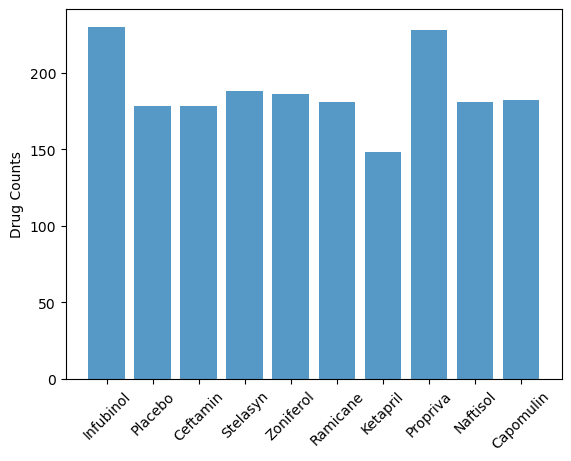

In [1317]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen = list(cleane["Drug Regimen"].unique())
regimen
mouse_time = cleane.groupby("Drug Regimen")["Mouse ID"].count()
plt.bar(regimen, mouse_time, alpha = 0.75, align= "center")
plt.ylabel("Drug Counts")
plt.xticks(rotation = 45)
plt.show()

In [1318]:
# x = [1, 2, 3, 4, 5]
# y = [10, 20, 15, 25, 30]

# bar_width = 0.4  # Adjust the width of the bars
# custom_positions = [1, 5, 10, 15, 20]  # Custom positions for the bars

# plt.bar(custom_positions, y, width=bar_width)
# plt.xticks(custom_positions, x)

# plt.show()

In [1319]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.


In [1320]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie ch

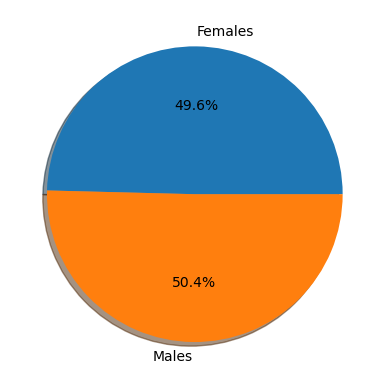

Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64


In [1321]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
labels = ["Females", "Males"]
gender = cleane.groupby("Sex")["Mouse ID"].nunique()
# Make the pie chart
plt.pie(gender, labels= labels, autopct="%1.1f%%", shadow=True)
plt.show()
print(gender)

## Quartiles, Outliers and Boxplots

In [1322]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
timem = cleane.groupby("Mouse ID")["Timepoint"].max().reset_index()
timem

clorox = pd.merge(cleane, timem, on=["Mouse ID", "Timepoint"], how= "inner")
clorox





,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,Propriva,Female,12,26,10,48.710661,0
244,z578,Ramicane,Male,11,16,45,30.638696,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [1323]:
# time_dict = timem.to_dict()

In [1324]:
# cleane['Max_Time_Point'] = cleane["Mouse ID"].map(time_dict)
# cleane
 



In [1325]:
# clean2 = cleane[cleane['Timepoint'] == cleane['Max_Time_Point']]
# clean2

In [1326]:
specimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# cleaner = clorox.loc[clorox["Drug Regimen"].isin(specimen)]
# cleaner
out = []  # type: ignore
tumor_v = []

for drug in specimen: 
    drug_data = clorox.loc[clorox["Drug Regimen"] == drug]

    tumor_v.append(drug_data["Tumor Volume (mm3)"])
    quartz = drug_data["Tumor Volume (mm3)"].quantile([0.25,0.75])
    low_q = quartz[0.25]
    high_q = quartz[0.75]
    IQR = high_q - low_q
    low_b = low_q - 1.5*IQR
    high_b = high_q - 1.5*IQR

    

    

    # tumor_v.extend(drug_data["Tumor Volume (mm3)"])

    outliers = drug_data.loc[(drug_data["Tumor Volume (mm3)"] < low_b) | (drug_data["Tumor Volume (mm3)"] > high_b)]
    out.append(outliers["Tumor Volume (mm3)"])
    






In [1327]:


# specimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# cleaner = cleane.loc[cleane["Drug Regimen"].isin(specimens)]
# cleaner


In [1328]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers.


    # Locate the rows which contain mice on each drug and get the tumor volumes


    # add subset


    # Determine outliers using upper and lower bounds


In [1329]:
# out = [] 
# for drug in specimens: 
#     drug_data = cleaner.loc[cleaner["Drug Regimen"] == drug]
#     quartz = drug_data["Tumor Volume (mm3)"].quantile([0.25,0.75])
#     low_q = quartz[0.25]
#     high_q = quartz[0.75]
#     IQR = high_q - low_q
#     low_b = low_q - 1.5*IQR
#     high_b = high_q - 1.5*IQR

#     outliers = drug_data.loc[(drug_data["Tumor Volume (mm3)"] < low_b) | (drug_data["Tumor Volume (mm3)"] > high_b)]
#     out.extend(outliers["Tumor Volume (mm3)"])
# out2 = len(out)
# print(out2)




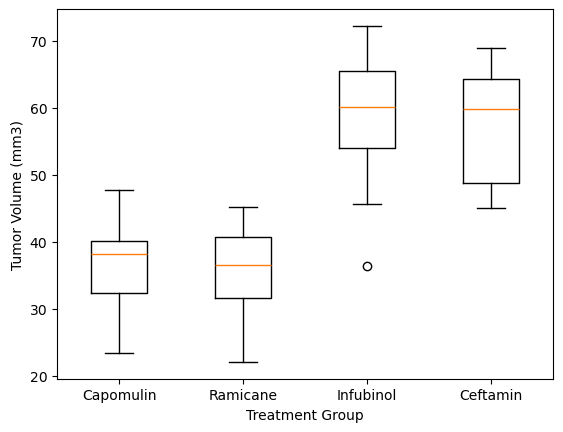

In [1330]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.


# capo = clorox[clorox["Drug Regimen"] == "Capomulin"]
# ram = clorox[clorox["Drug Regimen"] == "Ramicane"]
# ceft =clorox[clorox["Drug Regimen"] == "Ceftamin"]
# infu = clorox[clorox["Drug Regimen"] == "Infubinol"]

# capo_l = capo["Tumor Volume (mm3)"].tolist()
# ram_l = ram["Tumor Volume (mm3)"].tolist()
# ceft_l = ceft["Tumor Volume (mm3)"].tolist()
# infu_l = infu["Tumor Volume (mm3)"].tolist()

# tumor = [capo_l, ram_l, ceft_l, infu_l]

# plt.boxplot(tumor, showmeans=True)
# plt.show()

plt.boxplot(tumor_v, labels= specimen)
plt.xlabel('Treatment Group')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

plt.show()



# fig1, ax1 = plt.subplots()

## Line and Scatter Plots

In [1331]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

sca = clorox.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
sca


Mouse ID
a203    67.973419
a251    65.525743
a262    70.717621
a275    62.999356
a366    63.440686
          ...    
z435    48.710661
z578    30.638696
z581    62.754451
z795    65.741070
z969    73.867845
Name: Tumor Volume (mm3), Length: 248, dtype: float64

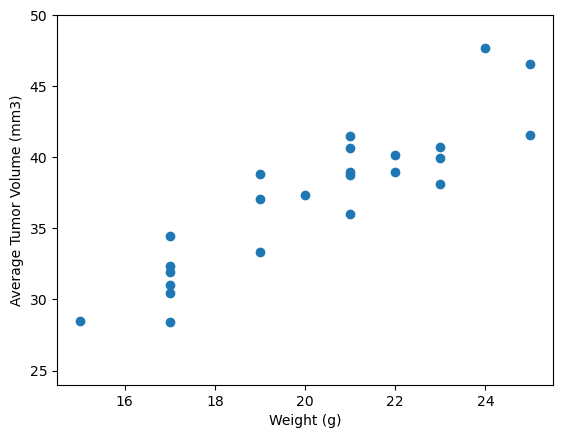

In [1332]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# sca = clorox.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
# sca

# sca_dict = sca.to_dict()



# clorox["Average Tumor Volume"] = cleane["Mouse ID"].map(sca_dict)
# clorox

# # # too_cleane = cleane.groupby("Mouse ID")
# # # too_cleane


# scattercap = clorox.loc[clorox["Drug Regimen"] == "Capomulin"]

# plt.scatter(scattercap["Weight (g)"], scattercap["Tumor Volume (mm3)"])
# plt.show()

capomulin_table = clorox.loc[clorox['Drug Regimen'] == "Capomulin"]
capomulin_average = capomulin_table.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.ylim(24, 50)
plt.show()



In [1333]:
# sca = clorox.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
# sca

# sca_dict = sca.to_dict()



# clorox["Average Tumor Volume"] = cleane["Mouse ID"].map(sca_dict)
# clorox

# # # too_cleane = cleane.groupby("Mouse ID")
# # # too_cleane


# scattercap = clorox.loc[clorox["Drug Regimen"] == "Capomulin"]

# plt.scatter(scattercap["Weight (g)"], scattercap["Tumor Volume (mm3)"])
# plt.show()

## Correlation and Regression

In [1334]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# m = clean2.iloc[:, 4]
m_weight = clorox.loc[(clorox["Drug Regimen"] == "Capomulin"), "Weight (g)"]
m_vol = clorox.loc[(clorox["Drug Regimen"] == "Capomulin"), "Tumor Volume (mm3)"]

correlation = st.pearsonr(m_weight, m_vol)
correlation



PearsonRResult(statistic=0.8767060403658116, pvalue=9.084429088673465e-09)

In [1335]:
(slo, inter, r , q, s) = st.linregress(m_weight, m_vol)
(slo, inter, r , q, s)

line = slo * m_weight + inter
line



19     39.958448
24     38.207980
61     31.206107
64     34.707043
66     39.958448
80     43.459384
83     36.457512
85     41.708916
87     38.207980
108    38.207980
115    34.707043
121    31.206107
124    34.707043
162    45.209853
163    31.206107
169    45.209853
174    31.206107
180    41.708916
183    31.206107
192    31.206107
204    38.207980
208    41.708916
220    38.207980
226    27.705170
239    31.206107
Name: Weight (g), dtype: float64

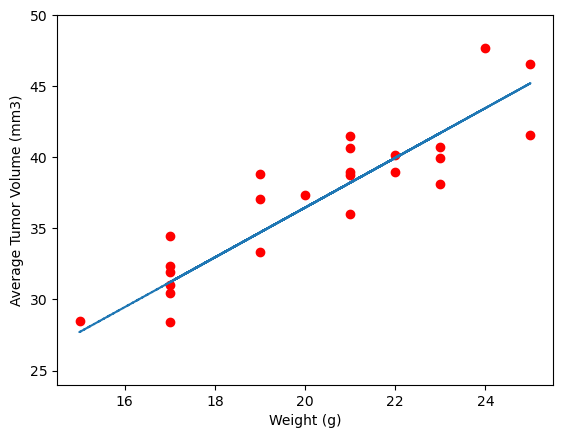

In [1336]:
plt.scatter(scattercap["Weight (g)"], scattercap["Tumor Volume (mm3)"], c= "red")
plt.plot(m_weight, line, "--")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.ylim(24, 50)
plt.show()

